# Кластеризация. Уменьшение количества цветов изображения

###### Введение
Самый распространенный тип задач машинного обучения — это задачи обучения с учителем. В них имеется обучающая выборка, для каждого объекта которой есть ответ, и нужно научиться предсказывать эти ответы для новых объектов. В такой постановке можно строго определить критерии качества.

Если же имеются лишь объекты, а ответов для них нет, то все равно можно пытаться найти в данных некую структуру. Задачи, которые ищут закономерности в неразмеченных выборках, называют задачами обучения без учителя. Типичный пример такой задачи — кластеризация, где требуется найти группы похожих объектов.

Кластеризация может использоваться для самых разных целей. В этом задании мы попробуем группировать схожие пиксели на изображении. Такой подход позволяет переходить к суперпиксельному представлению изображений, которое является более компактным и лучше подходит для решения ряда задач компьютерного зрения.

###### Реализация в sklearn
Алгоритм KMeans реализован в классе sklearn.cluster.KMeans. Так как это один из примеров unsupervised-задачи, для обучения достаточно передать только матрицу объектов.

В качестве метрики будем использовать PSNR — адаптация метрики MSE для задачи нахождениях сходства изображений.

Для работы с изображениями мы рекомендуем воспользоваться пакетом scikit-image. Чтобы загрузить изображение, необходимо выполнить следующую команду:

In [85]:
# позволяет выводить изображения прямо в ipython-notebook
%matplotlib inline
import numpy as np

In [86]:
from skimage.io import imread
image = imread('parrots.jpg')

После этих действий переменная image будет содержать изображение в виде numpy-массива размера n * m * 3, где n и m соответствуют размерам изображения, а 3 соответствует формату представления RGB.

Если вы хотите вывести изображение на экран, необходимо, чтобы у вас была установлена библиотека matplotlib. С помощью нее это делается следующим образом:

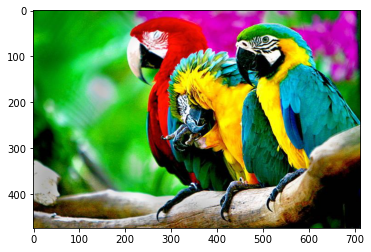

In [87]:
import pylab
pylab.imshow(image)

Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [88]:
from skimage import img_as_float

In [89]:
image2 = img_as_float(image)
image2.shape

(474, 713, 3)

In [140]:
w = image2.shape[0]
h = image2.shape[1]
d = image2.shape[2]

Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [91]:
# r = np.array([img[:,:,0].ravel()]).T
# g = np.array([img[:,:,1].ravel()]).T
# b = np.array([img[:,:,2].ravel()]).T
# result = np.hstack((r,g))
# result = np.hstack((result,b))
img = image2.reshape(-1, 3)
img

array([[0.01568627, 0.49411765, 0.01960784],
       [0.00784314, 0.49411765, 0.00784314],
       [0.00784314, 0.49411765, 0.00784314],
       ...,
       [0.02352941, 0.09019608, 0.11764706],
       [0.08235294, 0.16078431, 0.20392157],
       [0.0745098 , 0.16470588, 0.23529412]])

Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [8]:
from sklearn.cluster import KMeans

In [92]:
cluster = KMeans(init='k-means++', random_state=241)

In [93]:
cluster.fit(img)

KMeans(random_state=241)

In [94]:
labels = cluster.predict(img)

In [197]:
def recreate_image(codebook, labels, w, h, d):
    """Recreate the (compressed) image from the code book & labels
    labels - список по длине равный h * w (то есть числу пикселов в картинке), 
    значениями являются предсказанные кластеры для каждого пикселя. 
    
    codebook - это kmeans.cluster_centers_, то есть значение цвета для заданного кластера.     
    """ 
    
    image = np.zeros((w, h, d)) # массив из нулей размером с исходную картинку
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

закрасим центральными пикселями в кластерах:

In [96]:
image_pred = recreate_image(cluster.cluster_centers_, labels, w, h, d)

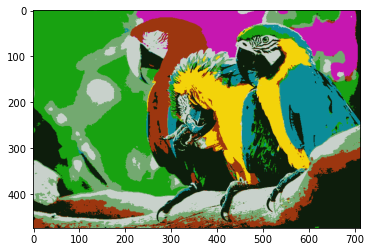

In [97]:
pylab.imshow(image_pred)

закрасим медианными пикселями в кластерах:

In [211]:
clust_median = []
for i in range(kmeans.n_clusters):
    st = [i for i in np.median(img[np.where(labels==i)], axis=0)]
    clust_median.append(st)
clust_median = np.array((clust_median))

In [112]:
image_pred_median = recreate_image(clust_median, labels, w, h, d)

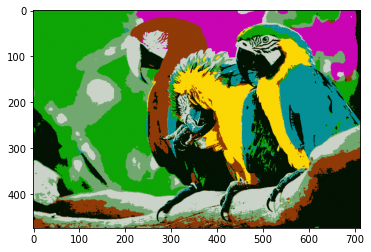

In [113]:
pylab.imshow(image_pred_median)

Измерьте качество получившейся сегментации с помощью метрики PSNR. Эту метрику нужно реализовать самостоятельно.

In [ ]:
# mse = np.mean((image2 - image_pred) ** 2)
# psnr = 10 * math.log10(float(1) / mse)

In [114]:
# mean
print(10 * np.log10(1.0 / np.mean((image2 - image_pred) ** 2)))

18.43667105839723


In [116]:
# median
print(10 * np.log10(1.0 / np.mean((image2 - image_pred_median) ** 2)))

18.146655471791103


Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера).

9.818835544771291


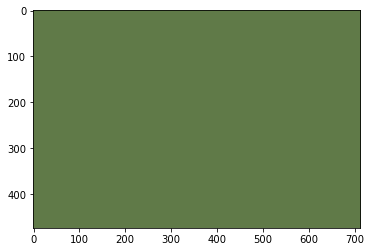

12.080064930239624


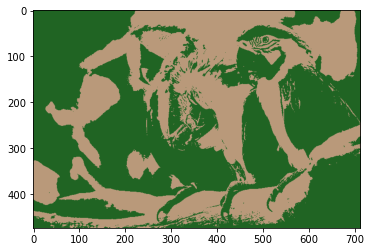

13.153474410744106


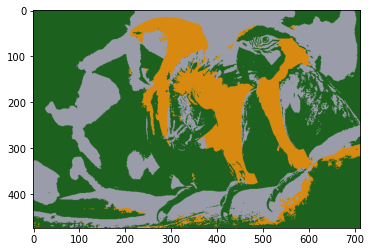

14.367748077751125


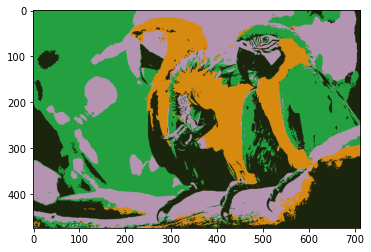

15.526915248398636


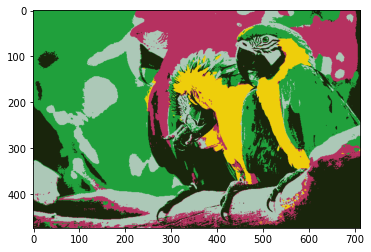

16.543897831740832


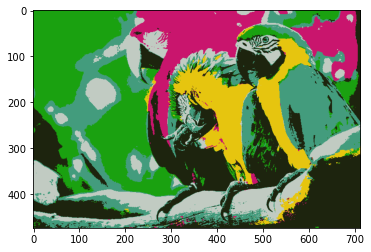

17.64088869742328


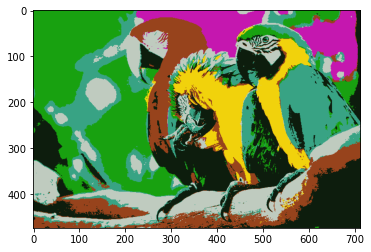

18.43667105839723


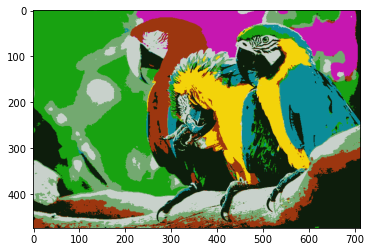

19.11240499673739


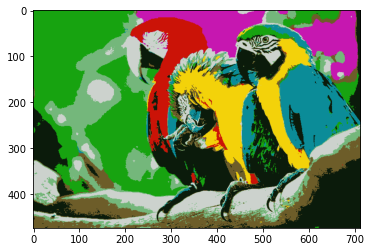

19.6393697167659


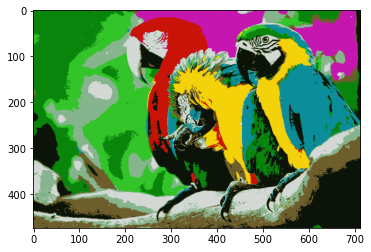

20.127123361402628


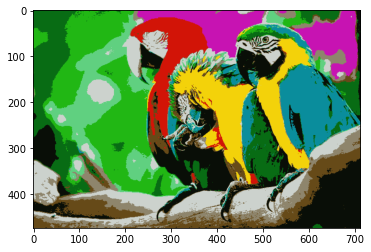

11


In [222]:
# mean
image = imread('parrots.jpg')
image2 = img_as_float(image)
w, h, d = original_shape = tuple(image2.shape)
assert d == 3
image_array = np.reshape(image2, (w * h, d))

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=241)
    kmeans.fit(image_array)
    labels = kmeans.predict(image_array)

    image_pred = recreate_image(kmeans.cluster_centers_, labels, w, h, d)
    psnr = 10 * np.log10(1.0 / np.mean((image2 - image_pred) ** 2))
    print(psnr)
    pylab.imshow(image_pred)
    pylab.show()
    if psnr >= 20:
        print(i)
        break

In [217]:
# median
clust_median = []
image = imread('parrots.jpg')
image2 = img_as_float(image)
w, h, d = original_shape = tuple(image2.shape)
assert d == 3
image_array = np.reshape(image2, (w * h, d))

for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=241)
    kmeans.fit(image_array)
    labels = kmeans.predict(image_array)
    
    clust_median = []
    for i in range(kmeans.n_clusters):
        st = [i for i in np.median(img[np.where(labels==i)], axis=0)]
        clust_median.append(st)
    clust_median = np.array((clust_median))

    image_pred = recreate_image(clust_median, labels, w, h, d)
    psnr = 10 * np.log10(1.0 / np.mean((image2 - image_pred) ** 2))
    print(psnr)
    if psnr >= 20:
        print(i)
        break

9.427840460507397
11.650216436393377
12.788196832555386
14.005760638202233
15.179272618915768
16.05391213731671
17.341044237540768
18.146655471791103
18.816039984444913
19.412342388847847
19.84625170662676
20.305935852415388
11
